# 1. Perkenalan Dataset

Dataset yang digunakan adalah **Heart Disease UCI** dari Kaggle. Dataset ini berisi data pasien untuk memprediksi keberadaan penyakit jantung berdasarkan 13 fitur medis.

**Sumber Dataset:** https://www.kaggle.com/datasets/ronitf/heart-disease-uci

**Deskripsi:**
- Total 303 baris data
- 14 kolom (13 fitur + 1 target)
- Target: 0 (tidak ada penyakit jantung) dan 1 (ada penyakit jantung)
- Terdapat missing values yang ditandai dengan '?'

**Fitur yang digunakan:**
- age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target

# 2. Import Library

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [55]:
df = pd.read_csv('../heart.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# 3. Memuat Dataset

In [56]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df['target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.15841

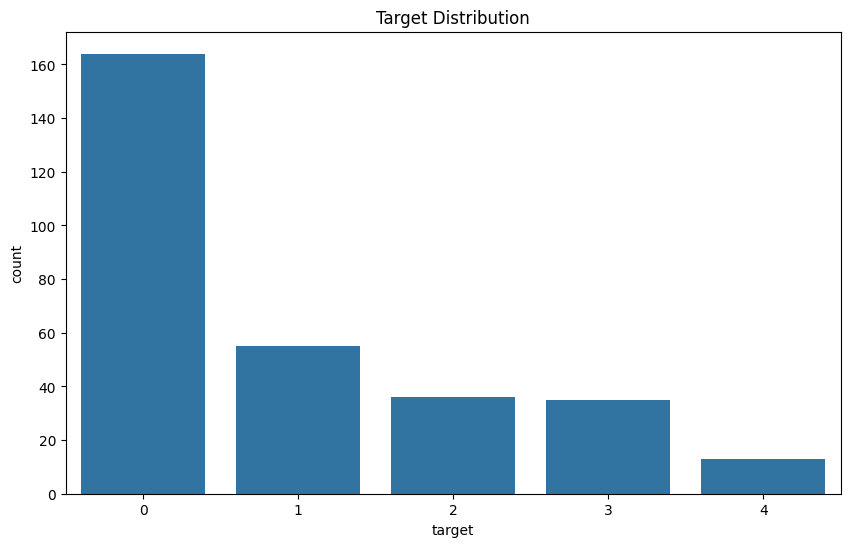

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='target')
plt.title('Target Distribution')
plt.show()

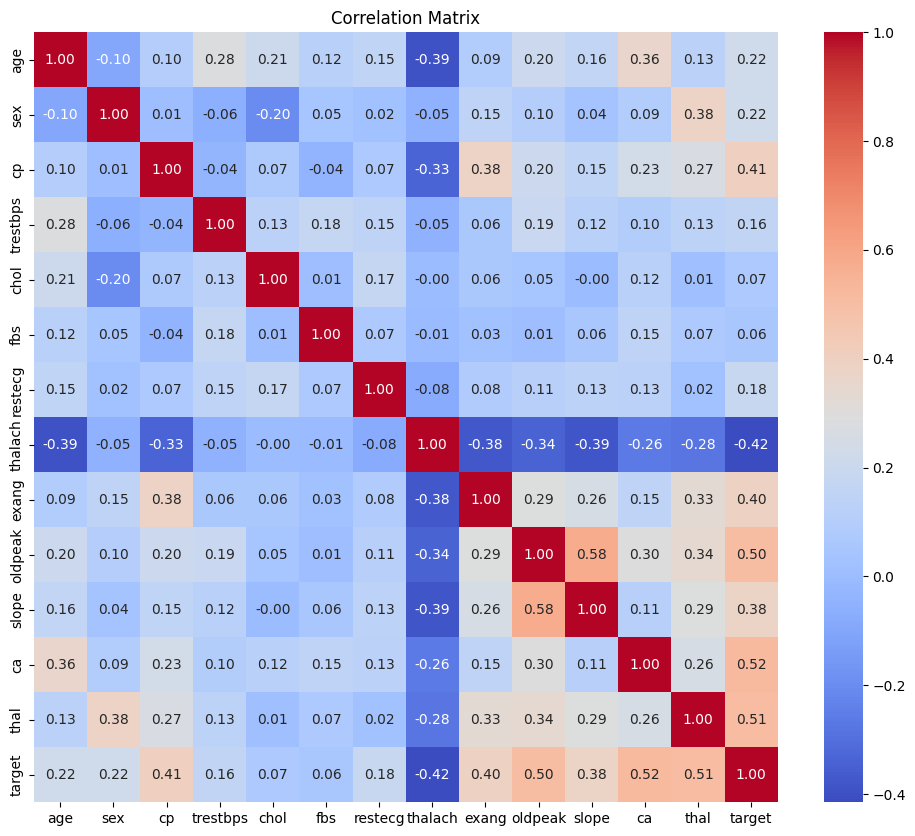

In [58]:
df_clean = df.replace('?', np.nan)
for col in ['ca', 'thal']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 4. Exploratory Data Analysis (EDA)

In [59]:
duplicates = df.duplicated().sum()
print(f"Duplicates: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
print(f"Dataset shape: {df.shape}")

Duplicates: 0
Dataset shape: (303, 14)


In [60]:
df_clean = df.replace('?', np.nan)
for col in df_clean.columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
df_clean = df_clean.fillna(df_clean.median())
print(f"Data shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
X = df_clean.drop('target', axis=1)
y = df_clean['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Data shape: (303, 14)
Missing values: 0
Train: (242, 13), Test: (61, 13)


In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
print(f"Scaled - Train: {X_train_scaled.shape}, Test: {X_test_scaled.shape}")
X_train_scaled.head()

Scaled - Train: (242, 13), Test: (61, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
97,0.594945,-1.46385,0.877858,1.020911,0.169014,-0.418040,1.027269,0.307680,-0.696177,1.320132,0.655669,1.460506,1.21400
82,-1.711319,0.68313,-0.158443,0.463338,1.327117,-0.418040,1.027269,1.411752,-0.696177,-0.900796,-0.963432,-0.701221,-0.86224
167,-0.063987,-1.46385,-1.194743,0.017280,0.720492,2.392117,1.027269,0.396006,1.436416,-0.900796,-0.963432,0.379642,-0.86224
288,0.155657,0.68313,-1.194743,-0.094234,-0.511143,-0.418040,1.027269,0.572657,-0.696177,-0.900796,-0.963432,-0.701221,1.21400
71,1.363700,0.68313,0.877858,-0.373021,0.095483,2.392117,-0.985679,0.572657,-0.696177,-0.729955,0.655669,1.460506,1.21400


In [62]:
import os
os.makedirs('heart_preprocessing', exist_ok=True)
train_df = X_train_scaled.copy()
train_df['target'] = y_train
test_df = X_test_scaled.copy()
test_df['target'] = y_test
train_df.to_csv('heart_preprocessing/heart_train_preprocessed.csv', index=False)
test_df.to_csv('heart_preprocessing/heart_test_preprocessed.csv', index=False)
print(f"Saved: Train {len(train_df)}, Test {len(test_df)}")

Saved: Train 242, Test 61
